## Homework 06: Optimization in Python

## Due Date: March 29, 2021, 4:00pm

#### Firstname Lastname: Zhifan Nan

#### E-mail: zn2041@nyu.edu

#### Enter your solutions and submit this notebook

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 270$. 


1.1. (15p)
Cast the problem as a nonlinear two-dimensional optimization problem over with box constraints (*hint*: remove the sum constraint, and ignore one of the positivity constraints which should not be violated with proper initialization) and solve it using the L-BFGS-B method of `scipy.optimize.minimize`.

1.2. (15p)
Cast the problem as an equivalent one-dimensional constrained optimization problem (*hint*: after removing the sum constraint, can you further use optimality conditions to remove one more variable?), and solve it using `scipy.optimize.minimize_scalar`.



### 1.1

In [ ]:
import scipy.optimize as opt

def f(X):
    x, y = X[0], X[1]
    return - x * y * (270 - x - y)

bnds = [(0, 270), (0, 270)]
x0 = [10, 10]
method = 'L-BFGS-B'
res = opt.minimize(f, x0, method = method, bounds = bnds)
res

      fun: -728999.9999999022
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01164153, -0.01164153])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 6
   status: 0
  success: True
        x: array([89.99998148, 89.99998047])

In [ ]:
print("x: {}, y: {}, z: {}, product value: {}".format(res.x[0], res.x[1], 270 - res.x[0] - res.x[1], -res.fun))

x: 89.99995472488244, y: 90.0000018177295, z: 90.00004345738805, product value: 728999.9999998225


### 1.2

Based on the constraint, we can rewrite the function as $P(x, y) = xy(270-x-y)$, and we know that at the optimal point, the gradient of the function will be zero, which means that $\nabla P = (270y - 2yx - y^2, 270x - x^2 - 2xy) = 0$. This gives us two equations $y = 270 - 2x$ and $y = (270 - x)/2$, and we can use any one of these to make it become a one-dimensional constrained optimization problem. Here I will use $y = 270 - 2x$, and then z becomes $z = 270 - x - (270 - 2x) = x$. The objective function becomes: $P(x) = x^2 * (270 - 2x)$.

In [9]:
import scipy.optimize as opt

def f_2(x):
    return - x ** 2 * (270 - 2 * x)

res = opt.minimize_scalar(f_2, method = "bounded", bounds = (0, 270))
res

     fun: -729000.0
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 90.00000006083206

In [10]:
print("x: {}, y: {}, z: {}, product value: {}".format(res.x, 270 - 2 * res.x, res.x, -res.fun))

x: 90.00000006083206, y: 89.99999987833587, z: 90.00000006083206, product value: 729000.0


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 17)^2.$$
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").


Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are multiple extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point report: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are both local mimima and maxima; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate stationary points, partition $-10 \leq x, y \leq 10$ into multiple regions and use "optimize.brute" in each of these regions. Then use the resulting points as starting points in "scipy.optimize.fmin_ncg".


### 2.1

In [ ]:
import numpy as np

f_min = lambda x: (x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2

def fprime(x):
    return np.array([4 * (x[0]**2 + x[1] - 10) * x[0] + 2 * (x[0] + x[1]**2 - 17),
                     2 * (x[0]**2 + x[1] - 10) + 4 * (x[0] + x[1]**2 - 17) * x[1]])

def fhess(x):
    return np.array([[12*x[0]**2 + 4*x[1] - 38, 4 * x[0] + 4 * x[1]], 
                     [4 * x[0] + 4 * x[1], 4 * x[0] + 12 * x[1]**2 - 66]])
    
f_max = lambda x: -((x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2)

def f_max_prime(x):
    return np.array([-(4 * (x[0]**2 + x[1] - 10) * x[0] + 2 * (x[0] + x[1]**2 - 17)),
                     -(2 * (x[0]**2 + x[1] - 10) + 4 * (x[0] + x[1]**2 - 17) * x[1])])

def f_max_hess(x):
    return np.array([[-(12*x[0]**2 + 4*x[1] - 38), -(4 * x[0] + 4 * x[1])], 
                     [-(4 * x[0] + 4 * x[1]), -(4 * x[0] + 12 * x[1]**2 - 66)]])

In [ ]:
f = f_min

slices = [slice(-10, 0), slice(0, 10)]
minima = []

for slice_1 in slices:
    for slice_2 in slices:
        x_start = opt.brute(f, (slice_1, slice_2))
        print("(x_start, y_start):", x_start)

        x_opt = opt.fmin_ncg(f, x_start, fprime = fprime, fhess=fhess)
        print("(x_opt, y_opt):", x_opt)

        minima.append(x_opt)
        print("-"*50)

(x_start, y_start): [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
(x_opt, y_opt): [-3.81607969 -4.56246421]
--------------------------------------------------
(x_start, y_start): [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
(x_opt, y_opt): [-2.36628111  4.4007137 ]
--------------------------------------------------
(x_start, y_start): [ 3.69426257 -3.6476754 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
(x_opt, y_opt): [ 3.69427946 -3.64770072]
-------------------------------

In [ ]:
f = f_max

print("(x_start, y_start): ", [0, 0])
x_max = opt.fmin_ncg(f, [0, 0], fprime = f_max_prime, fhess=f_max_hess)
print("(x_opt, y_opt): ", x_max)

(x_start, y_start):  [0, 0]
Optimization terminated successfully.
         Current function value: -407.343841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8
(x_opt, y_opt):  [-0.95712665 -0.26119845]


#### 2.2

In [ ]:
f = f_min

slices = [slice(-10, 0), slice(0, 10)]

for slice_1 in slices:
    for slice_2 in slices:
        x_start = opt.brute(f, (slice_1, slice_2))
        print("(x_start, y_start):", x_start)

        x_opt = opt.fmin_ncg(f, x_start, fprime = fprime)
        print("(x_opt, y_opt):", x_opt)

        print("-"*50)

(x_start, y_start): [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 12
         Hessian evaluations: 0
(x_opt, y_opt): [-3.81607969 -4.56246421]
--------------------------------------------------
(x_start, y_start): [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 12
         Hessian evaluations: 0
(x_opt, y_opt): [-2.36628111  4.4007137 ]
--------------------------------------------------
(x_start, y_start): [ 3.69426257 -3.6476754 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 10
         Hessian evaluations: 0
(x_opt, y_opt): [ 3.69427946 -3.64770072]
----------------------------

In [ ]:
f = f_max

print("(x_start, y_start): ", [0, 0])
x_opt = opt.fmin_ncg(f, [0, 0], fprime = f_max_prime)
print("(x_opt, y_opt): ", x_opt)

(x_start, y_start):  [0, 0]
Optimization terminated successfully.
         Current function value: -407.343841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 36
         Hessian evaluations: 0
(x_opt, y_opt):  [-0.95712665 -0.26119845]


#### 2.3

In [ ]:
f = f_min

slices = [slice(-10, 0), slice(0, 10)]
minima = []

for slice_1 in slices:
    for slice_2 in slices:
        x_start = opt.brute(f, (slice_1, slice_2))
        print("(x_start, y_start):", x_start)

        x_opt = opt.fmin_bfgs(f, x_start)
        print("(x_opt, y_opt):", x_opt)

        minima.append(x_opt)
        print("-"*50)

(x_start, y_start): [-3.81605069 -4.56248915]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
(x_opt, y_opt): [-3.8160797  -4.56246422]
--------------------------------------------------
(x_start, y_start): [-2.36631681  4.4007081 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
(x_opt, y_opt): [-2.36628112  4.4007137 ]
--------------------------------------------------
(x_start, y_start): [ 3.69426257 -3.6476754 ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
(x_opt, y_opt): [ 3.69427945 -3.64770072]
--------------------------------------------------
(x_start, y_start): [2.48808596 3.80943115]
Optimization terminated succe

In [ ]:
f = f_max

print("(x_start, y_start): ", [0, 0])
x_max = opt.fmin_bfgs(f, [0, 0])
print("(x_opt, y_opt): ", x_max)

(x_start, y_start):  [0, 0]
Optimization terminated successfully.
         Current function value: -407.343841
         Iterations: 6
         Function evaluations: 32
         Gradient evaluations: 8
(x_opt, y_opt):  [-0.95712663 -0.26119845]


#### check gradient using JAX

In [ ]:
import jax.numpy as jnp
from jax import jit, grad, hessian

ff = jit(f_min)
ffprime = jit(grad(f_min))
ffhess = jit(hessian(f_min))

ff_max = jit(f_max)
ffprime_max = jit(grad(f_max))
ffhess_max = jit(hessian(f_max))

In [ ]:
x = np.ones(2)
print("Gradient:", fprime(x), ffprime(x))
print("Hessian\n", fhess(x),'\n\n', ffhess(x))

Gradient: [-62. -76.] [-62. -76.]
Hessian
 [[-22.   8.]
 [  8. -50.]] 

 [[-22.   8.]
 [  8. -50.]]


#### 2.4

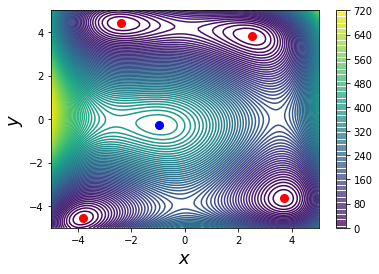

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2

def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 100)
for x_min in minima:
    ax.plot(x_min[0], x_min[1], 'ro', markersize = 8)
ax.plot(x_max[0], x_max[1], 'bo', markersize = 8)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
plt.colorbar(c, ax=ax)
plt.show()